# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# Copy the link from the "raw" button 
#https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz

# load the file - Wine Quality 
red_wine = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep="\t")
red_wine

#red_wine has 12 columns + head with no missing data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


This dataset had no missing values, as stated in the dataset information portion on the UC Irvine Machine Learning Repsoitory site

In [4]:
#show a random sample of 10 rows
red_wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
1522,6.1,0.32,0.25,2.3,0.071,23.0,58.0,0.99633,3.42,0.97,10.6,5
160,7.6,0.95,0.03,2.0,0.090,7.0,20.0,0.99590,3.20,0.56,9.6,5
1415,6.2,0.58,0.00,1.6,0.065,8.0,18.0,0.99660,3.56,0.84,9.4,5
770,7.1,0.59,0.02,2.3,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,6
796,8.7,0.46,0.31,2.5,0.126,24.0,64.0,0.99746,3.10,0.74,9.6,5
118,8.8,0.55,0.04,2.2,0.119,14.0,56.0,0.99620,3.21,0.60,10.9,6
151,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4
1060,11.6,0.23,0.57,1.8,0.074,3.0,8.0,0.99810,3.14,0.70,9.9,6
1067,11.1,0.31,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9,7
1227,9.0,0.58,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5


### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [5]:
# list the columns
list(red_wine.columns)


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'target']

YOUR ANSWERS HERE



Without being a sommelier I am aware that wine has many characteristics, or just plain, normal qualities. 
This dataset focuses on Portugese wine, I prefer Italian whites and French reds. 
* fixed acidity: types of acids that preserve the wine qualities and color, these acids can be natural or added
* volatile acidity: gaseous acids that contribute to smell and taste, these acids can be removed from the wine
* citric acid: can be added to wine for acidity or to remove iron and copper. 
* residual sugar: sugars left over from fermentation
* chlorides: level of ions in the wine, NaCl. Prefer a small amount as it takes away from the taste. (Unless of course you love salt) 
* free sulfur dioxide(FSO2): helps protect wine from spoiling and oxidation
* total sulfur dioxide: similiar in FSO2, its the total amount of sulfur dioxide, the amount of which is free and the amount of which is binded to other chemicals in the wine.
* density: measured by g/ml and/or specific gravity of the wine. 
* pH: level of acidity in wine, average about 3.0 - 4.0 
* sulphates: sulfites are found naturally in wine, sulphates however... but sulphites are from SO2 
* alcohol: percentage of ethanol produced in the wine from the fermented sugars by the yeast. 
* target is the quality (1-10) 

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

The red wine data set - 
* 1599 rows, 12 columns
* Numerical data
* 1 column = Target, 11 columns of features
* No missing data
* 148 rows of outliers 

In [6]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Density and chlorides had the lowest standard deviation, theres not much of a difference in any of the wine in the dataset therefore I would say they did not contribute to a better or worse quality of wine

Red Wine Outliers: 

In [7]:
from scipy import stats
import numpy as np
#check for outliers in the data using z score (value - mean)/ std
z_scores = np.abs(stats.zscore(red_wine.select_dtypes(include='number')))

z_df = pd.DataFrame(z_scores, columns=red_wine.select_dtypes(include='number').columns)

outliers = red_wine[(z_df > 3).any(axis=1)]
outliers


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.10,5
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.20,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.20,5
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.30,5
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.20,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1505,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,5
1570,6.4,0.360,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.40,6
1574,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.50,6


In [8]:
outliers.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,8.413514,0.575574,0.325811,4.024324,0.146696,23.425676,73.256757,0.997105,3.263851,0.810743,10.441554,5.405405
std,2.490899,0.256612,0.222677,3.439603,0.125905,16.469345,49.163737,0.003090,0.245472,0.346872,1.431965,1.002296
min,4.600000,0.180000,0.000000,0.900000,0.012000,3.000000,9.000000,0.990070,2.740000,0.390000,8.400000,3.000000
25%,6.800000,0.407500,0.180000,1.900000,0.069750,10.000000,37.750000,0.995685,3.087500,0.560000,9.300000,5.000000
50%,7.850000,0.540000,0.300000,2.300000,0.090500,19.000000,63.500000,0.997150,3.250000,0.705000,9.925000,5.000000
75%,9.325000,0.673750,0.490000,4.650000,0.176500,34.000000,103.500000,0.998920,3.382500,0.952500,11.125000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Because this data represents true numeric values for red wine I will not clean the outliers. This is important variation. There was no unusual data points that would suggest an error in data entry. 

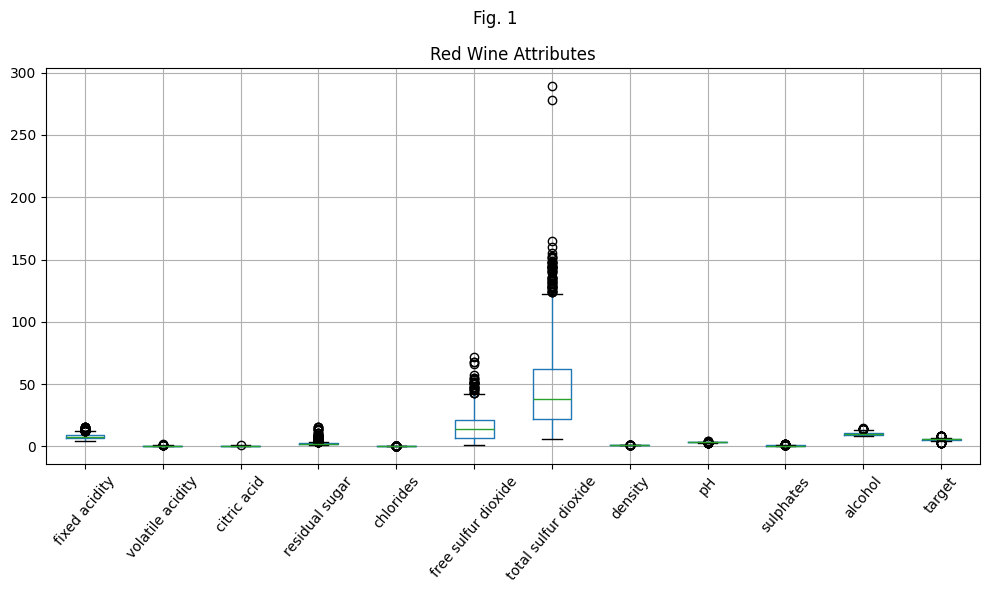

In [9]:

# box plot for all numeric values
plt.figure(figsize=(10,6))
red_wine.boxplot()
plt.title("Red Wine Attributes")
plt.suptitle('Fig. 1') 
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()



This box plot (Fig. 1) shows that most of the features values are very similar to each other. In my opinion this shows that these features don't contribute to the target (quality scoring) as strongly as 3 of the feautures, fixed acidity, free sulfur dioxide (FSO2), and total sulfur dioxide (TSO2).  

We know that the TSO2 and the FSO2 had high standard deviations so these features show the most variation

<Figure size 800x500 with 0 Axes>

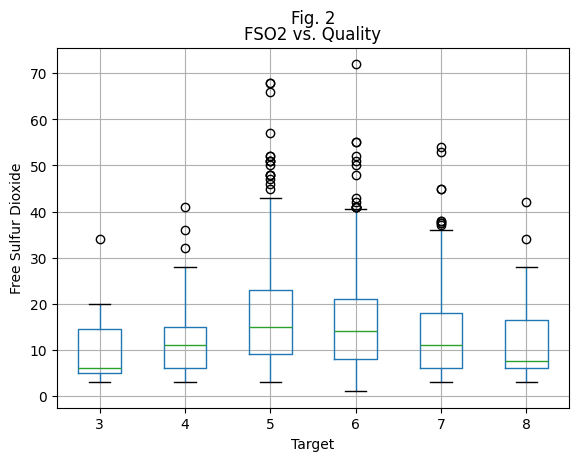

In [10]:
plt.figure(figsize=(8, 5))
red_wine.boxplot(column='free sulfur dioxide', by='target')
plt.title("FSO2 vs. Quality")
plt.suptitle('Fig. 2') 
plt.xlabel('Target')
plt.ylabel('Free Sulfur Dioxide')
plt.show()

Fig 2. bar graph doesn't help much in predicting high quality wine, with the highest target of 8 being very similar to the target of 4

<Figure size 800x500 with 0 Axes>

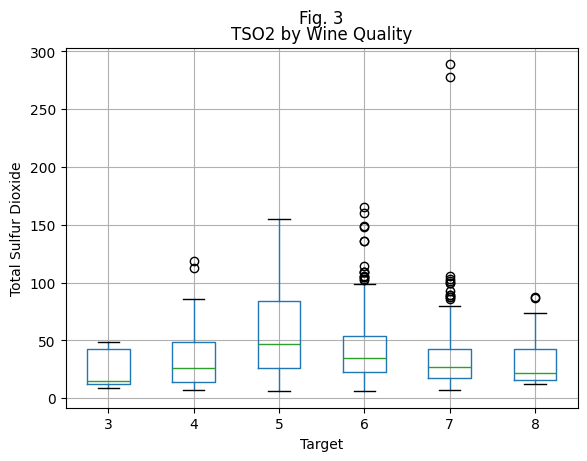

In [57]:
plt.figure(figsize=(8, 5))
red_wine.boxplot(column='total sulfur dioxide', by='target')
plt.title('TSO2 by Wine Quality')
plt.suptitle('Fig. 3') 
plt.xlabel('Target')
plt.ylabel('Total Sulfur Dioxide')

plt.show()

Total sulfur dioxide bar graph (fig. 3) shows that a high amount of TSO2 gives a target of 7  
Outliers are common in most target values while the median lines stayed close under 50. Higher quality wine does not always mean lower sulfur.  

<Figure size 800x500 with 0 Axes>

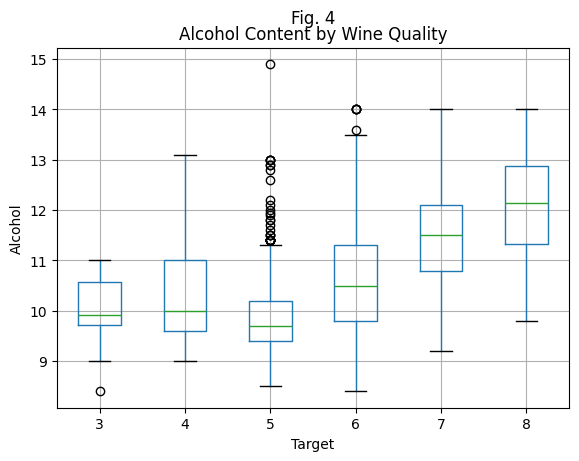

In [12]:
# Plotting 
plt.figure(figsize=(8, 5))
red_wine.boxplot(column='alcohol', by='target')
plt.title('Alcohol Content by Wine Quality')
plt.suptitle('Fig. 4') 
plt.xlabel('Target')
plt.ylabel('Alcohol')

plt.show()

With this bar graph (Fig 4) we can predict that most Portugese Red wine under 10% alcohol is low in quality while anything greater than 11% can be considered higher quality

 "A wine with high TSO2 has usually had many SO2 additions made over its lifetime, usually because the FSO2 keeps dropping. When we see a wine where the FSO2 is an unusually small percentage of the TSO2, it’s often an indication that there’s something making the wine chemically and/or microbially unstable."   
 https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/

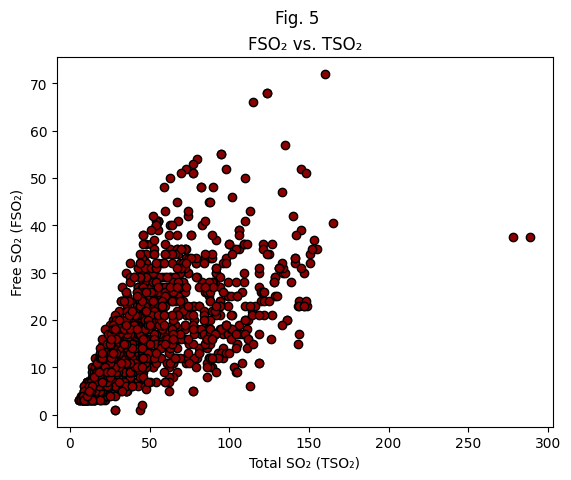

In [13]:
#After reading this I wanted to see the effect with the data provided
plt.scatter(red_wine['total sulfur dioxide'], red_wine['free sulfur dioxide'],color= 'darkred',  edgecolor='black')
plt.xlabel("Total SO₂ (TSO₂)")
plt.ylabel("Free SO₂ (FSO₂)")
plt.title("FSO₂ vs. TSO₂")
plt.suptitle("Fig. 5")
plt.show()


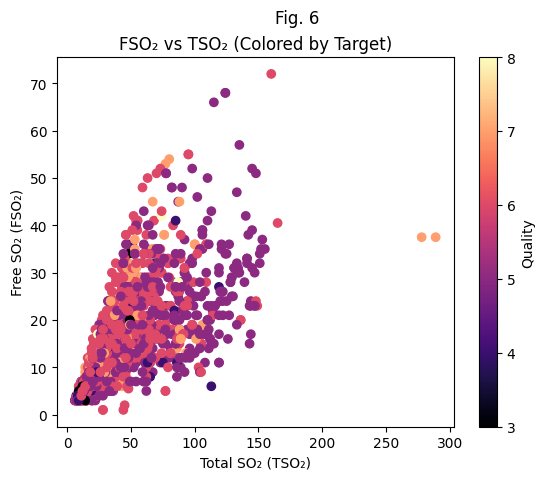

In [14]:

plt.scatter(red_wine['total sulfur dioxide'], red_wine['free sulfur dioxide'], c=red_wine['target'],cmap='magma')
plt.xlabel("Total SO₂ (TSO₂)")
plt.ylabel("Free SO₂ (FSO₂)")
plt.title("FSO₂ vs TSO₂ (Colored by Target)")
plt.suptitle("Fig. 6")
cbar = plt.colorbar()
cbar.set_label("Quality")

plt.show()

In [15]:
#Percentages of each row and target value (3-8)
percentages = red_wine['target'].value_counts(normalize=True) * 100
percentages = percentages.sort_index()
print(percentages)

target
3     0.625391
4     3.314572
5    42.589118
6    39.899937
7    12.445278
8     1.125704
Name: proportion, dtype: float64


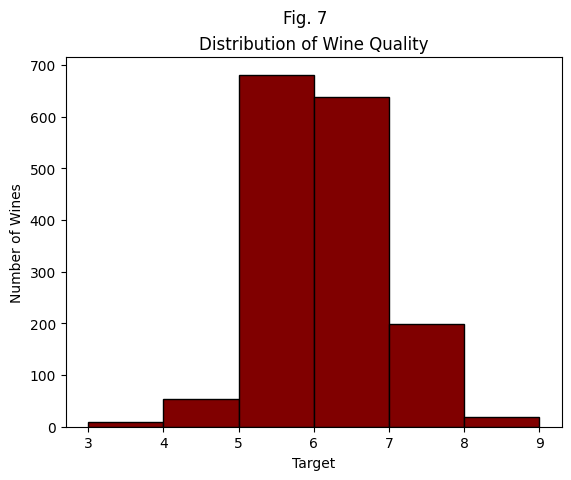

In [16]:
#histogram showing the distribution of the percentages 
plt.hist(red_wine['target'], bins=range(int(red_wine['target'].min()), int(red_wine['target'].max())+2), color= 'maroon',  edgecolor='black')
plt.title('Distribution of Wine Quality')
plt.suptitle('Fig. 7')
plt.xlabel('Target')
plt.ylabel('Number of Wines')
plt.show()

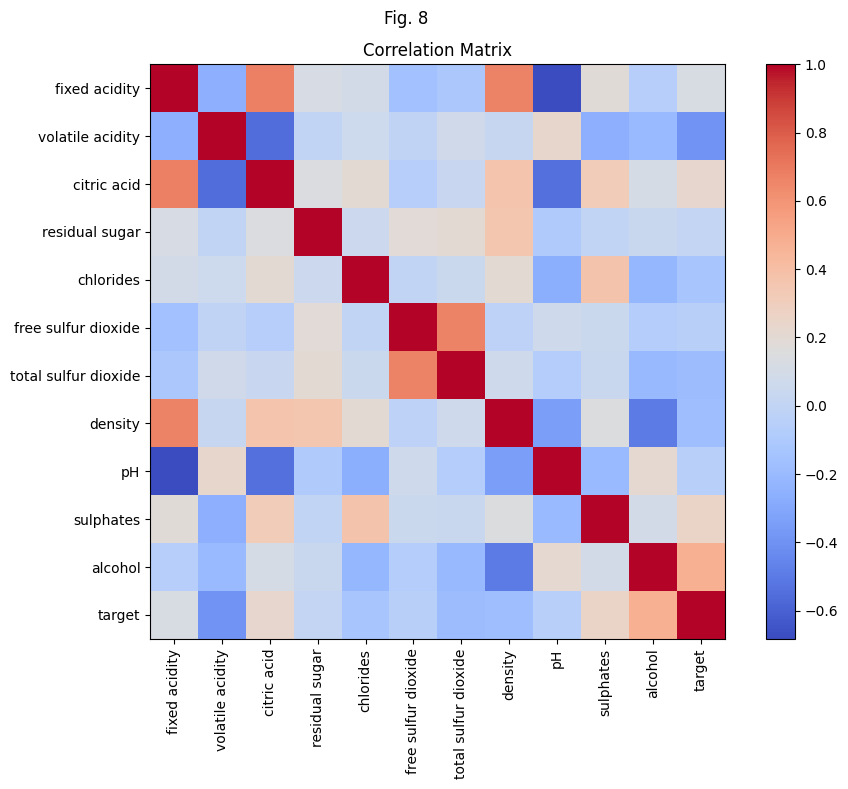

In [17]:
#correlation matrix
corematrix = red_wine.corr(numeric_only=True).values
cols = red_wine.corr(numeric_only=True).columns
plt.figure(figsize=(10, 8))
im = plt.imshow(corematrix, cmap="coolwarm")
plt.colorbar(im)
plt.xticks(np.arange(len(cols)), cols, rotation=90)
plt.yticks(np.arange(len(cols)), cols)
plt.title("Correlation Matrix")
plt.suptitle("Fig. 8")
plt.tight_layout()
plt.show()


After my EDA I found 3 charts below the most interesting. After each chart will follow a markdown as to why I found them the most interesting.  

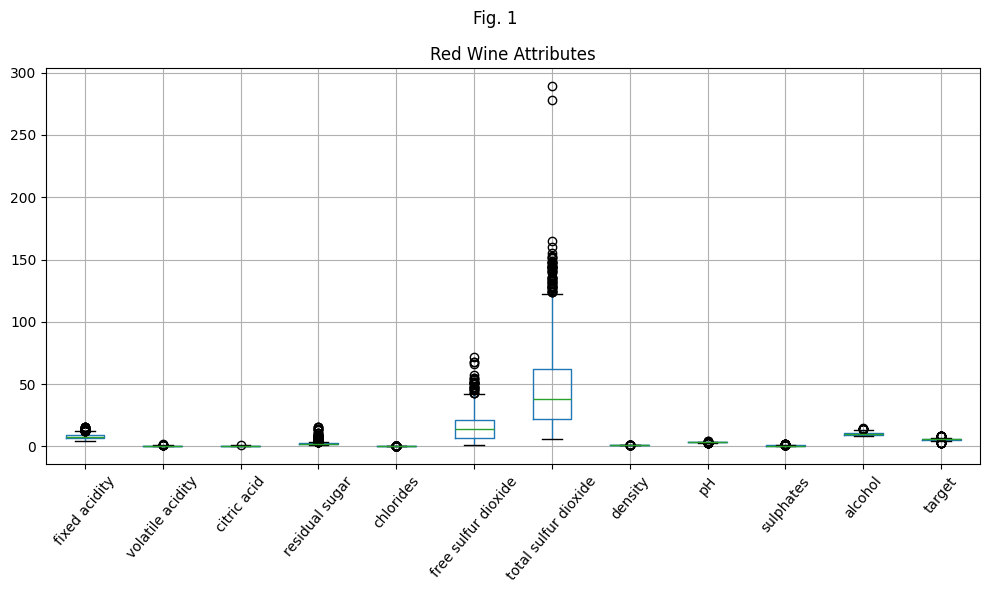

In [18]:
# Top choice in charts
plt.figure(figsize=(10,6))
red_wine.boxplot()
plt.title("Red Wine Attributes")
plt.suptitle('Fig. 1') 
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

Just by looking at this chart quickly you can see that the free sulfur dioxide and the total sulfur dioxide had the most variability in the data. This tells us that it's possible that these two attributes (features) affect the target greatly.  
  
This is my top choice for chart because its a quick visual that helps narrow information down for a predictive model

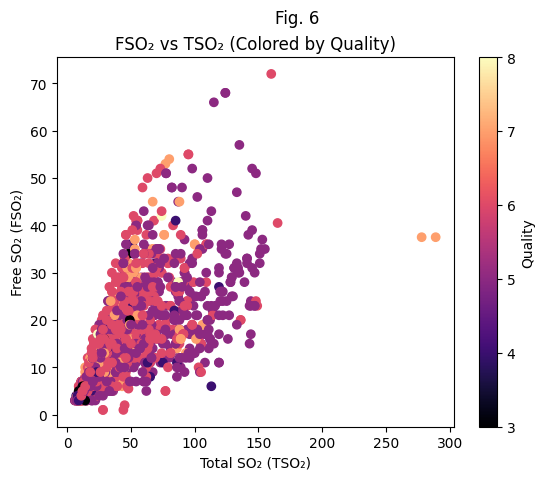

In [19]:
# Second Choice
plt.scatter(red_wine['total sulfur dioxide'], red_wine['free sulfur dioxide'], c=red_wine['target'],cmap='magma')

plt.xlabel("Total SO₂ (TSO₂)")
plt.ylabel("Free SO₂ (FSO₂)")
plt.title("FSO₂ vs TSO₂ (Colored by Quality)")
plt.suptitle("Fig. 6")
cbar = plt.colorbar()
cbar.set_label("Quality")

plt.show()

This chart is my second choice.  
You have a mixed bag here, but majority of the rows had a target value of 5 or 6. Highest target was 8 and the yellow dots are all over the place.  
  
However, target values 6 and 7 had lower values of both FSO2 and TSO2 while the target value of 5 had higher TSO2 values. 

Target value 7 did have some outliers in the highest TSO2 values.

85% of the rows had a target value of 5 or 6.       


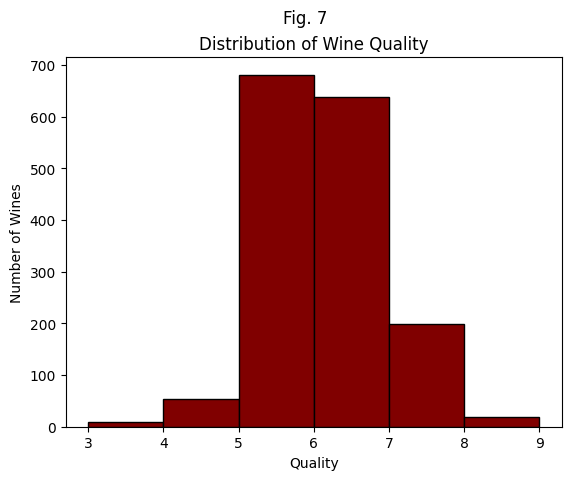

In [20]:
# 3rd choice for charts
plt.hist(red_wine['target'], bins=range(int(red_wine['target'].min()), int(red_wine['target'].max())+2), color= 'maroon',  edgecolor='black')
plt.title('Distribution of Wine Quality')
plt.suptitle('Fig. 7')
plt.xlabel('Quality')
plt.ylabel('Number of Wines')
plt.show()

I think it's great to see the distribution of the target score here. Majority of the data fall between 5-7. This means that if you go to the store and pick a red Portugese wine you havea very high chance of randomonly picking an average bottle. To the average person just picking up some wine, thats not terrible odds. Is it suggesting though that Portugese wine is average? 

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [21]:
corematrix = red_wine.corr(numeric_only = True)
print('Correlation matrix for Wine is: ')
print(corematrix)
# correlation matrix with only numeric values including self 


Correlation matrix for Wine is: 
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
target                     0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free su

In [22]:
#Value
corematrix = red_wine.corr(numeric_only = True)
max_corr = corematrix.abs().where(~np.eye(corematrix.shape[0], dtype=bool)).stack().idxmax()
print("Correlation value:", corematrix.loc[max_corr])

Correlation value: -0.6829781945685302


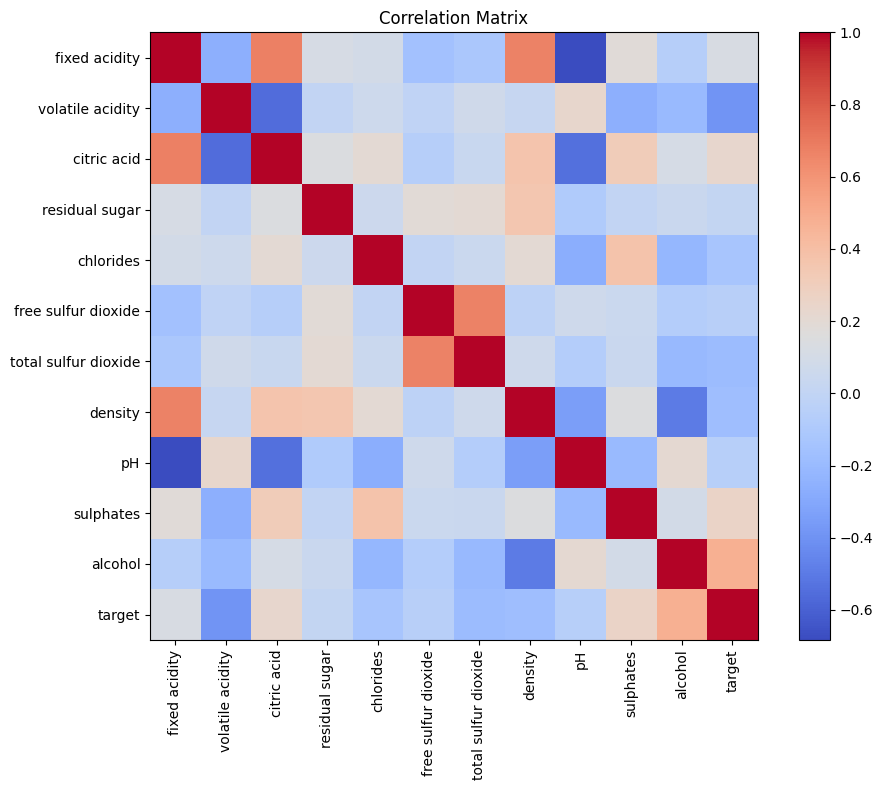

In [23]:
corematrix = red_wine.corr(numeric_only=True).values
cols = red_wine.corr(numeric_only=True).columns
plt.figure(figsize=(10, 8))
im = plt.imshow(corematrix, cmap="coolwarm")
plt.colorbar(im)
plt.xticks(np.arange(len(cols)), cols, rotation=90)
plt.yticks(np.arange(len(cols)), cols)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


YOUR ANSWERS HERE  
The best correlated pair is the fixed acidity and the pH with the value of -0.682978


### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

YOUR ANSWERS HERE  
#### Linear Regression   
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* https://www.geeksforgeeks.org/machine-learning/ordinary-least-squares-ols/

####  Ridge Regression  
* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
* https://www.ibm.com/think/topics/ridge-regression

#### Random Forest  
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 
* https://en.wikipedia.org/wiki/Random_forest


### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

YOUR ANSWERS HERE

In [24]:
#import the necessary tools 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [25]:
# drop columns except for the target 
X = red_wine.drop(columns= 'target') # features
y = red_wine['target'] # target(quality)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model 1 Linear Regression:

In [26]:
#Model 1 - Linear Regression (Linear)
linear = LinearRegression()
linear.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
linear_y_pred = linear.predict(X_test) #predictions

In [28]:
linear_l2 = mean_squared_error(y_test, linear_y_pred) #L2 loss
linear_l1 = mean_absolute_error(y_test, linear_y_pred) #L1 loss
print(f"Linear Regression L2: {linear_l2: .3f}, L1: {linear_l1: .3f}")

Linear Regression L2:  0.390, L1:  0.504


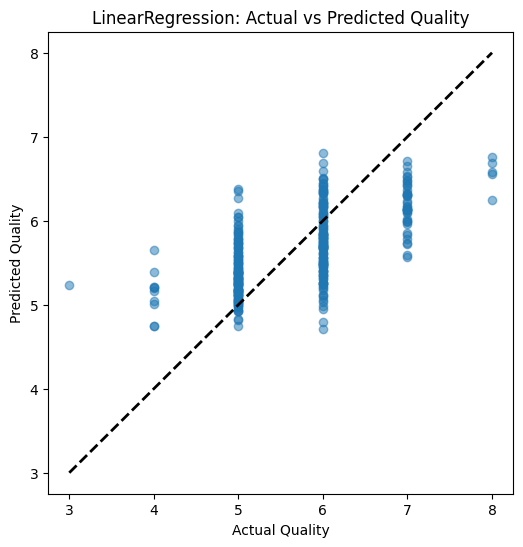

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, linear_y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) 
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('LinearRegression: Actual vs Predicted Quality')
plt.show()

Model 2 Ridge Regression:

In [30]:
#Model 2: Ridge regression
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

,alpha,10
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [31]:
ridge_y_pred = ridge.predict(X_test) #predictions

In [32]:
ridge_l2 = mean_squared_error(y_test, ridge_y_pred) #L2 loss
ridge_l1 = mean_absolute_error(y_test, ridge_y_pred) #L1 loss
print(f"Ridge Regression L2: {ridge_l2: .3f}, L1: {ridge_l1: .3f}")

Ridge Regression L2:  0.406, L1:  0.514


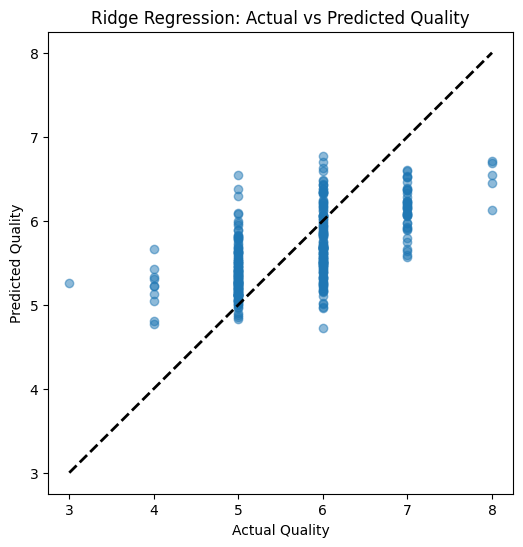

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, ridge_y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) 
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Ridge Regression: Actual vs Predicted Quality')
plt.show()

Model 3 Random Forest Regressor

In [34]:
forest = RandomForestRegressor(n_estimators=300, random_state=42)
forest.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
forest_y_pred = forest.predict(X_test) #predictions

In [36]:
forest_l2 = mean_squared_error(y_test, forest_y_pred) #L2 loss
forest_l1 = mean_absolute_error(y_test, forest_y_pred) #L1 loss
print(f"RandomForestRegressor(n_estimators=300) L2: {forest_l2: .3f}, L1: {forest_l1: .3f}") 


RandomForestRegressor(n_estimators=300) L2:  0.306, L1:  0.424


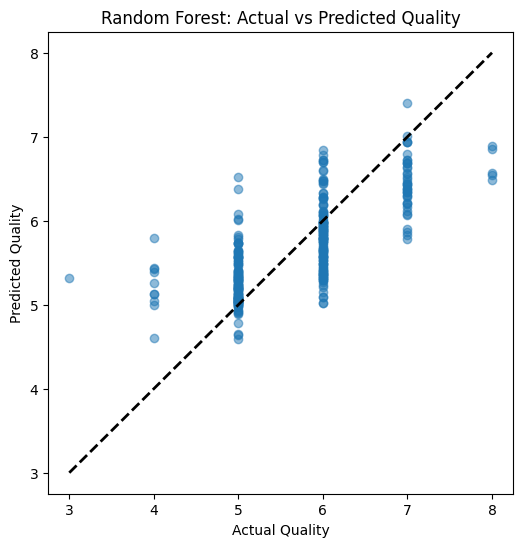

In [37]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, forest_y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Random Forest: Actual vs Predicted Quality')
plt.show()

Results:

Random Forest is the best regression model for this dataset thus far. The linear and ridge behaved very similar.

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [38]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error
kf = KFold(n_splits=5, shuffle=True, random_state=42)
l2_scorer= make_scorer(mean_squared_error)

In [39]:
linear_cv = cross_validate(linear, X, y, scoring=l2_scorer, cv=5, return_train_score=True)
linear_cv

{'fit_time': array([0.00361514, 0.0040853 , 0.00374269, 0.00213408, 0.0024755 ]),
 'score_time': array([0.00134897, 0.00127578, 0.00125003, 0.00148869, 0.00121236]),
 'test_score': array([0.44538803, 0.45217851, 0.44438074, 0.40926102, 0.43193864]),
 'train_score': array([0.41846638, 0.40966167, 0.41059128, 0.41962294, 0.41567715])}

In [40]:
linear_cv['test_score'].mean()

np.float64(0.4366293880320982)

In [41]:
linear.fit(X, y)
linear.score(X, y)

0.36055170303868833

In [42]:
ridge_cv = cross_validate(ridge, X, y, scoring=l2_scorer, cv=5, return_train_score=True)
ridge_cv

{'fit_time': array([0.00387025, 0.00258255, 0.00249672, 0.00361609, 0.00273347]),
 'score_time': array([0.00138021, 0.0013392 , 0.00166488, 0.00166011, 0.00460434]),
 'test_score': array([0.42788177, 0.45262177, 0.44742826, 0.42294451, 0.44587981]),
 'train_score': array([0.42653138, 0.41755876, 0.41869845, 0.42622326, 0.42245738])}

In [43]:
ridge_cv['test_score'].mean()

np.float64(0.43935122482472544)

In [44]:
ridge.fit(X, y)
ridge.score(X, y)

0.3510810637062468

In [45]:
forest_cv = cross_validate(forest, X, y, scoring=l2_scorer, cv=5, return_train_score=True)
forest_cv

{'fit_time': array([2.2762239 , 1.88548493, 1.97610879, 2.12099886, 2.1064558 ]),
 'score_time': array([0.02755785, 0.02258754, 0.02280474, 0.02292848, 0.02528334]),
 'test_score': array([0.3794633 , 0.42822774, 0.43291479, 0.43985993, 0.43532299]),
 'train_score': array([0.04472392, 0.04342657, 0.04264971, 0.04243514, 0.04262961])}

In [46]:
forest_cv['test_score'].mean()

np.float64(0.42315775047892723)

In [47]:
forest.fit(X, y)
forest.score(X, y)

0.9340264162979125

YOUR ANSWER HERE:  
The non linear regression model: Random Forest did the best here with 93%. The linear models scored close to the answers in Q6 but still below the random forest. 
This dataset would best be modeled with a non linear regression model.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [49]:
#mean of all data in red_wine
red_wine_mean = red_wine.mean(axis=0)
red_wine_mean

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
target                   5.636023
dtype: float64

In [50]:
#stand deviation of all data in red wine
red_wine_std = red_wine.std(axis=0)
red_wine_std

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
target                   0.807569
dtype: float64

In [51]:
#mean zero standardization
red_wine_standardized = (red_wine - red_wine_mean)/red_wine_std
red_wine_standardized

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271,-0.787576
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136,0.450707
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460,0.450707
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243,-0.787576


In [52]:
red_wine_standardized.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,1.688594e-16,-1.066481e-16,-1.110917e-16,2.132961e-16,-6.221137e-17,2.666202e-17,-3.469617e-14,2.861723e-15,6.665504e-16,7.109871e-17,6.221137e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00,-3.264143e+00
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01,-7.875763e-01
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01,4.507074e-01
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01,4.507074e-01
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00,2.927275e+00


In [53]:
standardize_transform = StandardScaler()
standardize_transform.fit(red_wine)

,copy,True
,with_mean,True
,with_std,True


In [54]:
linear_pipeline = Pipeline([('scaler', StandardScaler()), ('linear', LinearRegression())])
linear_cv_l2 = linear_cv['test_score'].mean()
linear_train_l2 = linear_cv['train_score'].mean()
print('Linear Standardized CV:', linear_cv_l2)
print('Linear Standardized Trained L2:', linear_train_l2)

Linear Standardized CV: 0.4366293880320982
Linear Standardized Trained L2: 0.41480388295435205


In [55]:
ridge_pipeline = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha=1.0))])
ridge_cv_l2 = ridge_cv['test_score'].mean()
ridge_train_l2 = ridge_cv['train_score'].mean()
print('Ridge Standardized CV:', ridge_cv_l2)
print('Ridge Standardized Trained L2:', ridge_train_l2)

Ridge Standardized CV: 0.43935122482472544
Ridge Standardized Trained L2: 0.422293848784712


In [56]:
forest_pipeline = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestRegressor(n_estimators=300, random_state=42))])
forest_cv_l2 = forest_cv['test_score'].mean()
forest_train_l2 = forest_cv['train_score'].mean()
print('Forest Standardized CV:', forest_cv_l2)
print('Forest Standardized Trained L2:', forest_train_l2)

Forest Standardized CV: 0.42315775047892723
Forest Standardized Trained L2: 0.0431729898968921


YOUR ANSWERS HERE  

All models performed differently after standardization scaling.  
Linear:  
* Linear Standardized CV: 0.4366293880320982
* Linear Standardized Trained L2: 0.41480388295435205
* Linear Regression L2:  0.390    

Ridge Regression:  
* Ridge Standardized CV: 0.43935122482472544
* Ridge Standardized Trained L2: 0.422293848784712
* Ridge Regression L2:  0.406  

Random Forest Regressor:   
* Forest Standardized CV: 0.42315775047892723
* Forest Standardized Trained L2: 0.0431729898968921
* RandomForestRegressor(n_estimators=300) L2:  0.306

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

YOUR ANSWERS HERE

This seems too noisy and inefficient so, not much of a solution.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

YOUR ANSWERS HERE  
  
The best model for this dataset is the Random Forest Regressor. This dataset responds better to a non linear approach. It had the lowest L2 score. CV fit score was the highest at 93%.  It minimized the CV L2 loss.  
  
In my EDA with the original dataset it was difficult to visualize a clear, linear reason for a higher target value.  This was a clear indication that a non-linear model would be best.  The chemical make up of wine varies greatly and doesn't always justify a higher quality or lower quality.  
  
The Wine dataset used all numeric values and there was no missing data points.  I chose 3 basic regression models, linear, ridge, and random forest. The first 2, linear and ridge, are linear models while the random forest is non linear (decision tree). I believed these were good choice because they are simple and easy to interpret. Choosing at least one non linear and one linear show a good comparrison and ulitmately help make the best decision.  

There are only slight differences in the linear and ridge models. All values were similar suggesting that there might be some underfitting. The random forest values suggest overfitting but with the cross validation it proved to be the best model for this dataset.  There was a very low training loss (0.043) 

Ridge Regression is useful with multicollinearity.  
Linear Regression is a good baseline model 
Random Forest Regressor is a great decision tree used in non linear models.  
